<a href="https://colab.research.google.com/github/marjph/FTW-Day-4/blob/master/FTW_Day_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas_profiling

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas_profiling as pp
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # split dataset
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_selection import RFE # for Recursive Feature Elimination with Cross Validation


In [2]:
data = pd.read_csv("census.csv")

In [3]:
data

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
45218,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
45219,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
45220,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


In [4]:
report = pp.ProfileReport(data)

In [5]:
report

In [6]:
data.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [7]:
data['income'].head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

In [85]:
features_cont=['age','education-num','capital-gain','capital-loss','hours-per-week','income']
features_dummy = ['workclass', 'education_level','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [86]:
X_temp = data[features_dummy]
X_temp2 = data[features_cont]
# Convert text to numeric
X_temp3= pd.get_dummies(X_temp)
X_temp4 = pd.concat([X_temp2,X_temp3],axis=1)

In [87]:
Data1 = X_temp4
Data1 

,age,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13.0,2174.0,0.0,40.0,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13.0,0.0,0.0,13.0,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9.0,0.0,0.0,40.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7.0,0.0,0.0,40.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13.0,0.0,0.0,40.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,13.0,0.0,0.0,40.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
45218,39,13.0,0.0,0.0,36.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
45219,38,13.0,0.0,0.0,50.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
45220,44,13.0,5455.0,0.0,40.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [89]:
y = Data1['income']

In [90]:
features = list(Data1.columns)
features.remove('income')

In [91]:
X = Data1[features]

In [92]:
Data1

,age,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13.0,2174.0,0.0,40.0,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13.0,0.0,0.0,13.0,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9.0,0.0,0.0,40.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7.0,0.0,0.0,40.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13.0,0.0,0.0,40.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,13.0,0.0,0.0,40.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
45218,39,13.0,0.0,0.0,36.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
45219,38,13.0,0.0,0.0,50.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
45220,44,13.0,5455.0,0.0,40.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 60)

In [156]:
model=LogisticRegression()

rfe = RFE(estimator=model,step=1)
rfe.fit(X_train, y_train)
rfe = rfe.fit(X_train, y_train)
rfe.transform(X_train)
rfe.transform(X_test)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=uint8)

In [126]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 60)

In [157]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [158]:
coefficient = model.coef_

In [159]:
intercept = model.intercept_

In [160]:
coefficient

array([[-1.39864259, -1.05523211, -0.98790856, -1.50855516, -1.50105961,
         2.06775313,  1.27480748,  2.17368507,  1.68474393,  2.25257644,
         0.85445023, -1.00167309, -1.0762556 , -1.38666905, -1.37218952,
        -1.20757867, -1.56394984, -1.9294437 , -0.95926822, -1.40314613,
        -1.33324753, -0.77496437, -1.14678966, -1.42495425, -0.65042736]])

In [161]:
intercept

array([-2.48183901])

In [162]:
model.score(X_test, y_test) # accuracy

0.8029778138129284

In [163]:
y_predicted = model.predict(X_test)

In [164]:
#coefficients_pd = pd.DataFrame((list(zip(features, model.coef_ * 1000))), columns = ['Features', 'Coefficients'])

In [165]:
#coefficients_pd

In [166]:
#coefficients_pd.sort_values('Coefficients').set_index('Features').plot(kind = 'barh', color = 'g')

In [167]:
# confusion matrix
cf = confusion_matrix(y_test, y_predicted)
cf

array([[9734,  412],
       [2261, 1160]])

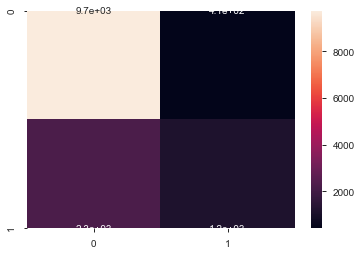

In [168]:
# heatmap of confusion matrix 
sns.heatmap(cf, annot = True)

In [169]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

       <=50K       0.81      0.96      0.88     10146
        >50K       0.74      0.34      0.46      3421

    accuracy                           0.80     13567
   macro avg       0.77      0.65      0.67     13567
weighted avg       0.79      0.80      0.77     13567

